# Global landtemperatures Analysis

In [72]:
%%script "C:\Users\Glenn.Herpoelaert\AppData\Local\Programs\Python\Python37\python.exe"
import sys
#print(sys.version)
#document.querySelectorAll("div.input").forEach(function(a){a.remove()})

In [73]:

#importeren van packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import csv
import datetime
import warnings
import statsmodels.api as sm   
import tensorflow as tf
from tensorflow import keras
from itertools import product    
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import dates as mpl_dates
import os
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Introduction

> In this notebook the GlobalTemperatures.csv dataset is being explored. Others, such as the GlobalLandTemperaturesByCity and the GlobalLandTemperaturesByCountry datasets have been left out.

> The first part is about exploring and visualising the data. This is also the focus of this notebook. In the second part 2 predictive models have been generated: an ARIMA model and a Facebook Prophet model.

In [44]:
#importing the file(s)

__file__ = 'GlobalTemperatures.csv'
__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))
__location__ = os.path.join(__location__, __file__)

df_temperatures = pd.read_csv(__location__,parse_dates=['dt'],index_col='dt')


# Exploration

In [45]:
print(df_temperatures.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB
None


> All variables, except for the index, are floats.

In [5]:
df_temperatures.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_temperatures.tail()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


> The timeseries starts at 1750-01-01 and goes until 2015-12-01. There is a monthly registration of data at every first day of the month.

> Quit a lot of variables do not contain data at the beginning of the timeseries. If we look at the tail of the timeseries we see that all the variables do have data.



##### Missing data

In [47]:
df_temperatures.isnull().sum()[df_temperatures.isnull().sum() != 0]

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

> All variables, except for LandAverageTemperature and LandAverageTemperatureUncertainty, indeed have 1200 missing data points. This is probably because those features were not registred yet at that time. LandAverageTemperature and LandAverageTemperatureUncertainty also have 12 missings.                   

In [50]:
df_temperatures[df_temperatures.LandAverageTemperature.isnull()]

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> In the first three years there were 12 months without any data. We will skip those years until so we have a complete timeseries for the variables LandAverageTemperature and LandAverageTemperatureUncertainty. This is accepteable because older datapoints will contribute less to the predictive power of the model.

In [9]:
df_temperatures = df_temperatures.loc['1752-09-02':]

In [10]:
df_temperatures[df_temperatures.LandMaxTemperature.isna()==False].head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


> From 1850-01-01 until the end of the timeseries we have a dataset without any missings. For the analysis we can either focus solely on LandAverageTemperature	and LandAverageTemperatureUncertainty from the beginning of the dataset or we can start from 1850-01-01 and use all features.

In [11]:
df_temperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3159.000000,3159.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.377803,0.926390,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.378687,1.088716,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.318500,0.186000,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.618000,0.386000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548500,1.388500,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


> The data looks ok. We do not have outliers for the average temperatures. The features about temperature uncertainties have larger ranges between the min and max values if we look at the standard deviations needed to go from the mean to the min or max values.

In [12]:
temp_cols = ['LandAverageTemperature','LandAndOceanAverageTemperature','LandMaxTemperature','LandMinTemperature']
uncertainty_cols = ['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty']

##### Boxplot with average temperatures

Text(0, 0.5, 'Boxplots with Average Temperatures of the planet')

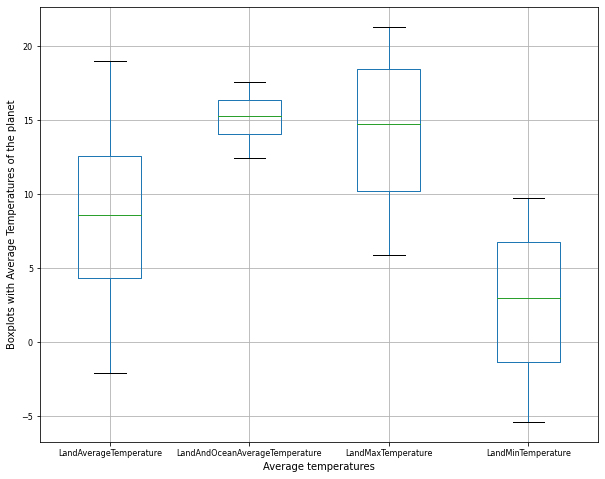

In [13]:
ax = df_temperatures.boxplot(column=temp_cols,fontsize=8,figsize=(10,8))
ax.set_xlabel('Average temperatures', fontsize=10)
ax.set_ylabel('Boxplots with Average Temperatures of the planet', fontsize=10)


> We clearly do not have outliers. All data seems sensical.

##### Boxplots with uncertainties

Text(0, 0.5, 'Boxplots with Temperature Uncertainties')

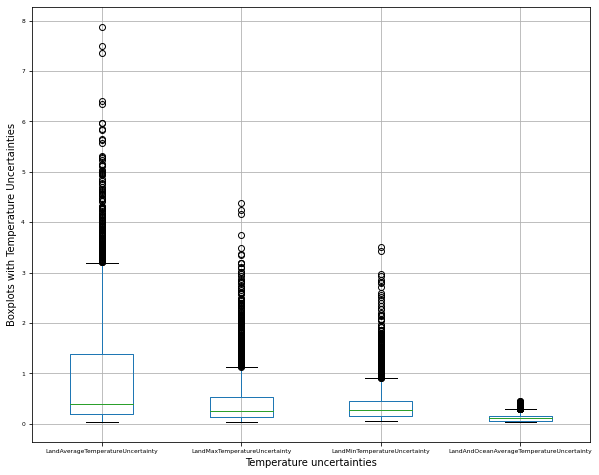

In [14]:
ax = df_temperatures.boxplot(column=uncertainty_cols,fontsize=6, figsize=(10,8))
ax.set_xlabel('Temperature uncertainties', fontsize=10)
ax.set_ylabel('Boxplots with Temperature Uncertainties', fontsize=10)



##### Data distribution

Text(0, 0.5, 'Density plot of Land Average Temperature levels of the planet')

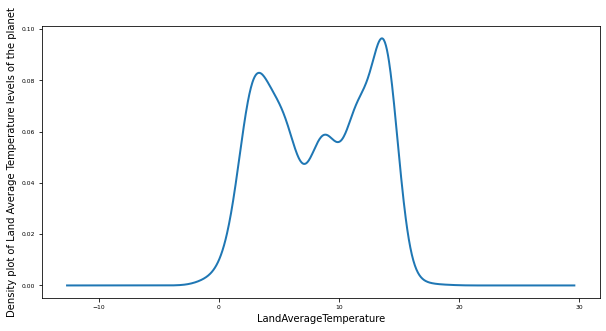

In [15]:
#data distribution
#density plot of land average temperatures to assess the distribution of the data

ax = df_temperatures['LandAverageTemperature'].plot(kind='density', linewidth=2, fontsize=6, figsize=(10,5))
ax.set_xlabel('LandAverageTemperature', fontsize=10)
ax.set_ylabel('Density plot of Land Average Temperature levels of the planet', fontsize=10)


> The Kernel density plot shows that the data is centered around 2 points which results in a plot with 2 peaks.

##### Plotting the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A9BE7610>,
      dtype=object)

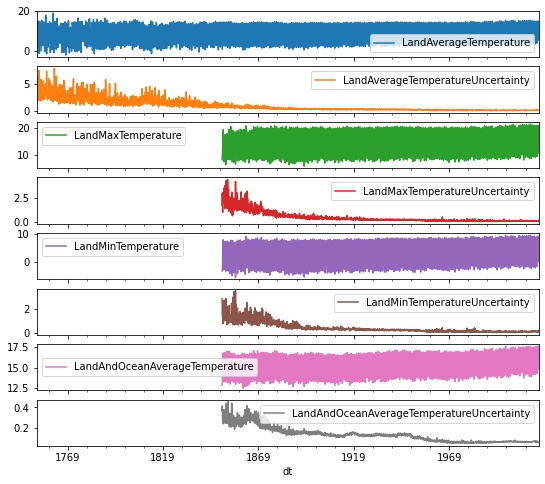

In [16]:
df_temperatures.plot(subplots=True, figsize=(9,8))


> The data for the average temperatures does not show clear information. There are probably too much datapoints on the x axis with a rather high range between min and max. 

> The data concerning the uncertainties is more insightfull: we can clearly see that the 4 different uncertainty levels are dropping accross time. For every feature, we could say that at a certain point, when the uncertainty reaches a low level of uncertainty, the uncertainty level stays low.

> At about 1850 the uncertainty level of landaveragetemperatures is at a trustworthy level while at that same time other measurements just have started and that with high levels of uncertainty.

##### Focus on land average temperature

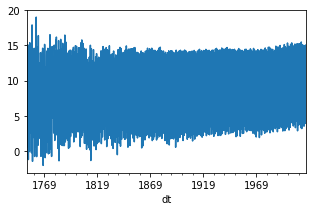

In [17]:
df_temperatures.LandAverageTemperature.plot(figsize=(5,3))


> The plot above is not really insightfull because the differences between hot summer days and cold winterdays get too much focus.

#### Plotting quantiles to show the volatility of the average temperature

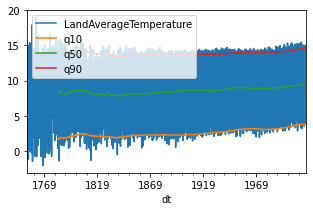

In [18]:
df_temperatures_q = df_temperatures.copy()
rolling = df_temperatures.LandAverageTemperature.rolling(360)

# Insert the rolling quantiles to the monthly returns
df_temperatures_q['q10'] = rolling.quantile(0.1).to_frame('q10')
df_temperatures_q['q50'] = rolling.quantile(0.5).to_frame('q50')
df_temperatures_q['q90'] = rolling.quantile(0.9).to_frame('q90')

df_temperatures_q.loc[:,['LandAverageTemperature','q10','q50','q90']].plot(figsize=(5,3))
plt.show()



> On the plot above we can see that the average temperature can have quite some volatility. The range between the min average and the max average temperature is on average about 15 degrees. 

> Furthermore, we are looking at a plot which shows the evolution of the data on a year level, while the data itself is on a monthly level.

##### Does downsamplig to quarters help?

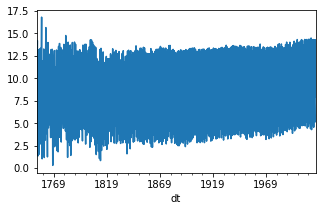

In [19]:
df_temperatures.LandAverageTemperature.resample('QS').mean().plot(kind='line',figsize=(5,3))

> Does downsampling to quarters help? Clearly not.

##### Downsampling to an annual level


In [54]:
df_yearly = df_temperatures.resample('AS').mean()

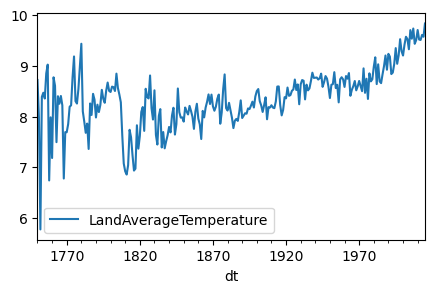

In [55]:
df_yearly[['LandAverageTemperature']].plot(kind='line',figsize=(5,3))


> Downsampling to a yearly level clearly helps to get the noise out of the chart. We can see that the average temperatures start to rise from a certain date and that it keeps on rising through the decania.

##### Percentage change

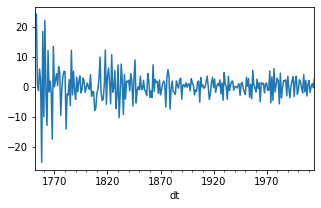

In [22]:
df_temperatures.LandAverageTemperature.resample('AS').mean().pct_change().mul(100).plot(figsize=(5,3))

> In the first decenia of the timeframe the percentage changes per year could diffenrentiate quite a lot more then in recent years.

##### Recent percentage change

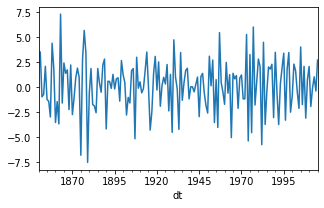

In [23]:
df_temperatures.loc['1850-01-01':].LandAverageTemperature.resample('AS').mean().pct_change().mul(100).plot(figsize=(5,3))

> Focus of percentage change of the last 150 years: at first sight the change seems to be stationary.

##### Normalising the dataset to a default starvalue of 100


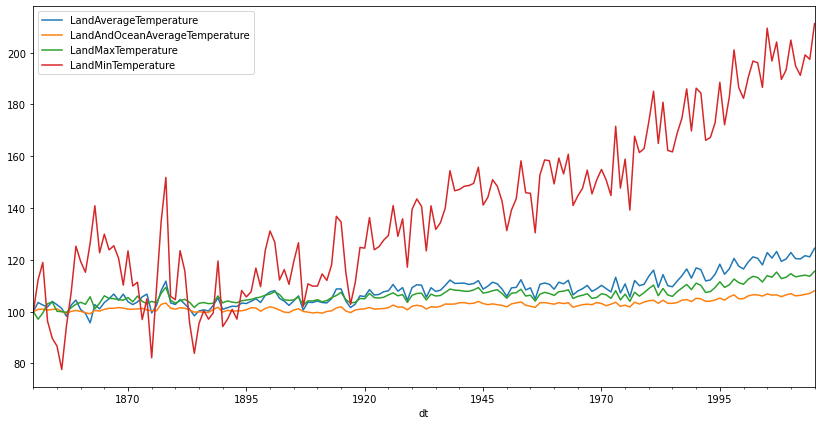

In [24]:
df_temperatures_recent = df_temperatures.loc['1850-01-01':]

resample = df_temperatures_recent.resample('AS')
df_yearly_recent = resample.mean()
df_yearly_recent_temps = df_yearly_recent[temp_cols]

normalized = df_yearly_recent_temps.div(df_yearly_recent_temps.iloc[0]).mul(100)
normalized.plot(figsize=(14,7)) 

> In the chart above, the dataset has been normalised to a default start value of 100. This allows to see the evolution per feature in comparison with the starting point. The average temperatures are grouped in one chart as are the uncertainty levels.

> Changes in the landmintemperature is clearly more profound than the changes of the other temperatures.

> None of the average temperatures are at the end at a lower level than the starting point. At the last decenia it looks like the averages start to increase a little bit more profoundly.

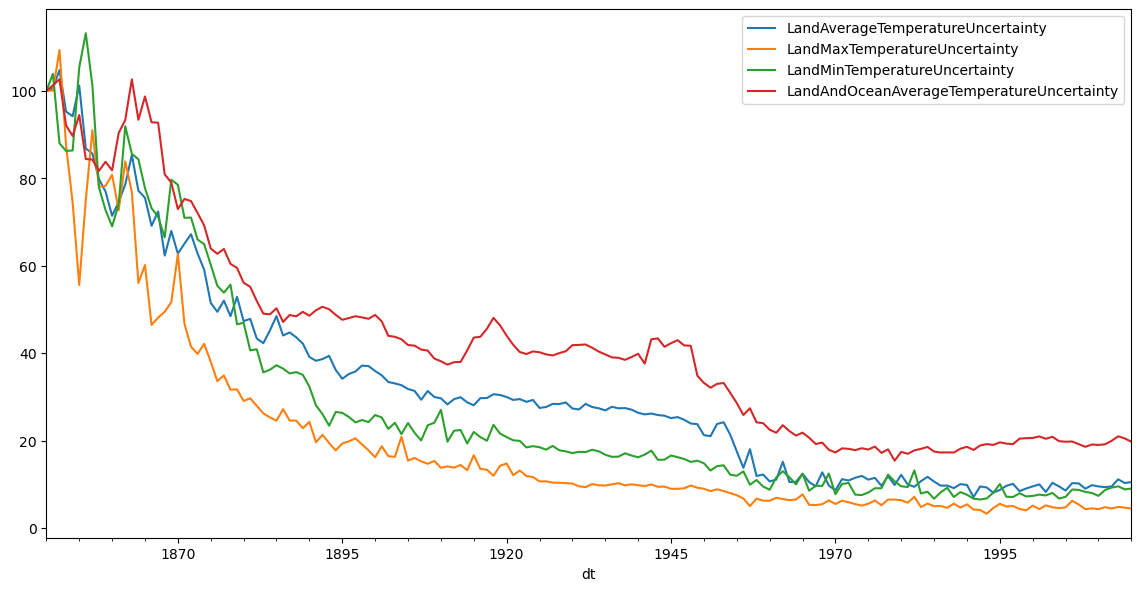

In [56]:
df_yearly_recent_uncerts = df_yearly_recent[uncertainty_cols]

normalized = df_yearly_recent_uncerts.div(df_yearly_recent_uncerts.iloc[0]).mul(100)
normalized.plot(figsize=(14,7)) 

> We can see that all the uncertainty levels first drop at a fast pace and that this pace goes slower and slower until they linger around a certain level of uncertainty.

##### Heatmap to visualize pairwise linear relationships 

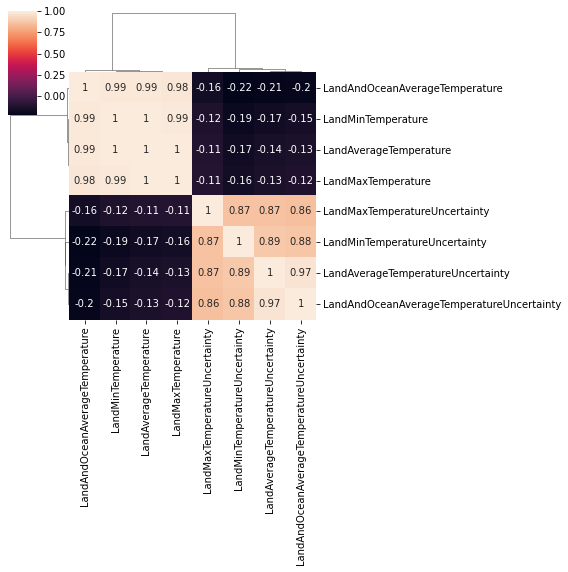

In [26]:
import seaborn as sns

# correlation matrix
corr_temp = df_temperatures_recent.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_temp,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(8, 8),
                     annot=True)



plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

> As expected, we see high correlations between the features about average temperatures and between the features about the uncertainties. The correlations between temperatures and uncertainties are low.

# Predictions: ARMA & Facebook Prophet

> The question that we try to answer here is that we will reach an average yearly temparature of more than 10 degrees Celcius in 2050 or not?

### Prediction via an ARMA model

> An ARMA model is a rather simple model. It is mainly used for short term predictions. But it simplicity allows to quickly develop a baseline model which can be a good starting point for the development of more complex models.

##### Is the yearly average temprature a random walk?

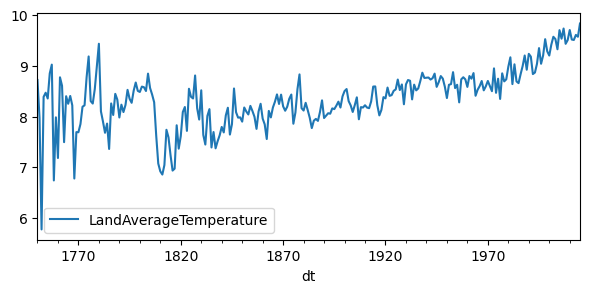

The p-value for the ADF test is 0.9394835586531824


In [57]:
#the whole timeframe

# we werken op jaarniveau
avg_temp_lt = pd.DataFrame(df_yearly.loc[:,'LandAverageTemperature'])
avg_temp_lt.index = pd.to_datetime(avg_temp_lt.index,format='%Y' )

# plotting of the average yearly temp
avg_temp_lt.plot(figsize=(7,3))
plt.show()

result = adfuller(avg_temp_lt['LandAverageTemperature'])
print("The p-value for the ADF test is", result[1])


###### The more recent period:

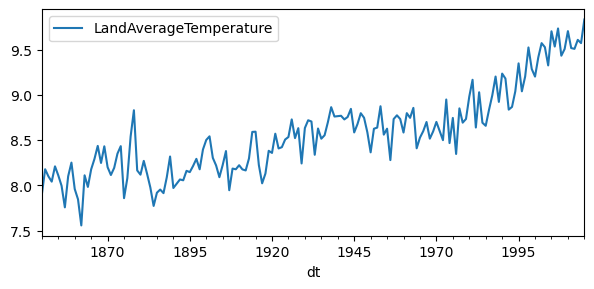

The p-value for the ADF test is 0.9505464412068483


In [74]:
#the more recent period
#is the yearly average temprature a random walk?

# we werken op jaarniveau
avg_temp = pd.DataFrame(df_yearly_recent.loc[:,'LandAverageTemperature'])
avg_temp.index = pd.to_datetime(avg_temp.index,format='%Y' )

# plotting of the average yearly temp
avg_temp.plot(figsize=(7,3))
plt.show()

result = adfuller(avg_temp['LandAverageTemperature'])
print("The p-value for the ADF test is", result[1])


> In the 2 plots above we check whether the yearly average temperature is a random walk or not. We take a look at 2 timeframes: 1 starting from the beginning of the measurements and the other one starting from the point where min and max temperatures also have been registred and where the uncertainty levels for the yearly average temperature begin to be really low. For temperature predictions the 2nd dataset wil be more relevant because climate change is rather an issue of the current and previous century and less of the 18th century and the fact that the uncertainty levels are low for that timerange we can build the model on more trustworthy data.

> Interestingly we see a completely different p-value. In the first dataset the p value is just slightly smaller than 0.05, but in the second dataset the p-value strongly exceeds 0.05 with a value of 0.95. This means that the latter model seems to follow a random walk pattern with drift. In order to make that data usefull, we will have to differentiate it.

##### Does it suffice to work with one diff?

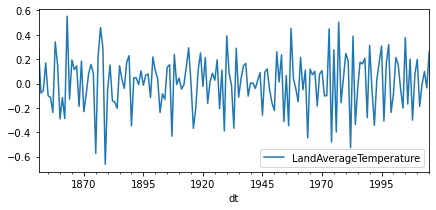

The p-value for the ADF test is 2.6256268654643265e-25


In [29]:
#the more recent period
#is the yearly average temprature a random walk?

# we werken op jaarniveau
avg_temp_diff = pd.DataFrame(df_yearly_recent.loc[:,'LandAverageTemperature'])
avg_temp_diff.index = pd.to_datetime(avg_temp.index,format='%Y' )
avg_temp_diff = avg_temp_diff.diff().dropna()
# plotting of the average yearly temp
avg_temp_diff.plot(figsize=(7,3))
plt.show()

result = adfuller(avg_temp_diff['LandAverageTemperature'])
print("The p-value for the ADF test is", result[1])


> Taking the difference clearly makes the data stationary. P is way below 0.05.

> Because the yearly average temperature since 1850 is a random walk with drift, we take the differences to make the data stationary. Consequently we calculate the autocorrelation and the partial autocorrelation. This input wil help to find the best ARMA model.


##### Autocorrelation and partial autocorrelation 

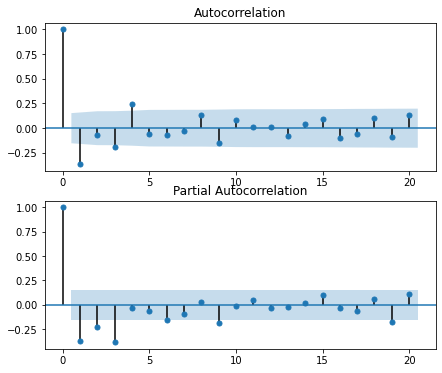

In [30]:
chg_temp = avg_temp.diff()
chg_temp = chg_temp.dropna()

fig, axes = plt.subplots(2,1,figsize=(7,6))

# ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

> There is no pronounced pattern in the Autocorrelation and Partial Autocorrelation plots except that both have a negative lag-1 autocorrelation. The partial autocorrelation also has a negative lag-2 and lag-3 (partial) autocorrelation.

> Based on the Akaike Information Criterion (AIC) score we are looking for the best ARMA model.  AIC measures the goodness-of-fit. The lower the AIC-score, the better.

##### AIC scores

In [31]:

#AR(1)
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("AIC voor AR(1): ", res_ar1.aic)

# AR(2) 
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("AIC voor AR(2): ", res_ar2.aic)

# ARMA(0,1) (arma = combinatie van een ar model en een ma model)
mod_arma01 = ARMA(chg_temp, order=(0, 1))
res_arma01 = mod_arma01.fit()
print("AIC voor ARMA(0,1): ", res_arma01.aic)

# ARMA(1,1)  
mod_arma11 = ARMA(chg_temp, order=(1, 1))
res_arma11 = mod_arma11.fit()
print("AIC voor ARMA(1,1): ", res_arma11.aic)


# ARMA(1,3)  
mod_arma13 = ARMA(chg_temp, order=(1, 3))
res_arma13 = mod_arma13.fit()
print("AIC voor ARMA(1,3): ", res_arma13.aic)

AIC voor AR(1):  -45.00150389327973
AIC voor AR(2):  -52.04982000175664
AIC voor ARMA(0,1):  -72.23567763962558
AIC voor ARMA(1,1):  -73.4746806098317
AIC voor ARMA(1,3):  -73.98353018442413


> The ARMA (1,3) model has the lowest AIC-score of the four models.

In [32]:
#for bigger plots
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

##### Predicting temperatures via the ARIMA(1,1,3) model

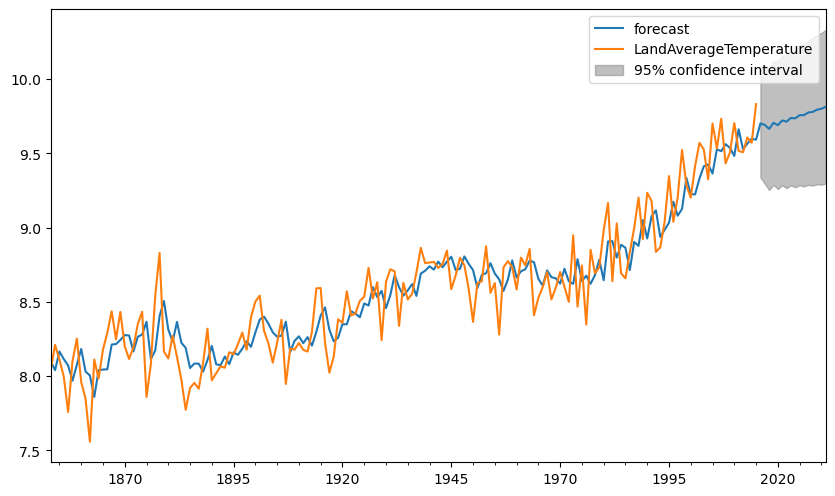

In [34]:
# temperaturen voorspellen via het ARIMA(1,1,3) model
#middelste waarde staat voor de differencing (hier een differencing van 1 dus toegepast) data mag dus nog niet gedifferenced zijn
#differencing tot en met dat de data stationary is, en niet meer dan dat

mod = ARIMA(avg_temp, order=(1,1,3))
res = mod.fit()

# lange termijnsvoorspelling tot 2051
ax = res.plot_predict(start='1853-01-01', end='2031-01-01')

plt.show()

In [35]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.LandAverageTemperature   No. Observations:                  165
Model:                       ARIMA(1, 1, 3)   Log Likelihood                  42.992
Method:                             css-mle   S.D. of innovations              0.186
Date:                      Sat, 22 May 2021   AIC                            -73.984
Time:                              12:45:59   BIC                            -55.348
Sample:                          01-01-1851   HQIC                           -66.419
                               - 01-01-2015                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0100      0.004      2.813      0.005       0.003       0.017
ar.L1.D.LandAverageTemperature    -0.8365      0.243     -3.442      0.001      -1.313      -0.360
ma.L1.D.LandAverageTemperature     0.2619      0.233      1.122      0.262      -0.195       0.719
ma.L2.D.LandAverageTemperature    -0.5968      0.188     -3.172      0.002      -0.965      -0.228
ma.L3.D.LandAverageTemperature    -0.2250      0.081     -2.766      0.006      -0.384      -0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1955           +0.0000j            1.1955            0.5000
MA.1            1.2302           +0.0000j            1.2302            0.0000
MA.2           -1.5464           +0.0000j            1.5464            0.5000
MA.3           -2.3358           +0.0000j            2.3358            0.5000
-----------------------------------------------------------------------------
"""

> According to the model the temperature will keep on rising for the coming 30 years. Eventually the land average temperature would rise above 10 degrees. An important remark is that the confidence interval at 2050 has a range of more than 1 whole degree. This undermines the predictive power of the model. Maybe the Facebook prophet model can predict the yearly average temperature at 2050 with more confidence.

### Prediciton via a Facebook prophet model


> Facebook prophet has been chosen because we want to do long term predicions of the average temperature. This model has proven its value for long term predicitons. 

In [61]:
#'conda install pystan'

#'conda install -c conda-forge fbprophet'

In [62]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install fbprophet

In [38]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


##### Making the dataset 'Prophet' compliant

In [39]:
#Making the dataset 'Prophet' compliant
df_temp_fb = df_yearly_recent.reset_index()[['dt', 'LandAverageTemperature']]
df_temp_fb.rename(columns={"dt": "ds", "LandAverageTemperature": "y"}, inplace=True)
df_temp_fb.head()

,ds,y
0,1850-01-01,7.900667
1,1851-01-01,8.178583
2,1852-01-01,8.100167
3,1853-01-01,8.041833
4,1854-01-01,8.210500


#### Making predictions

In [40]:
#alternative 1" default profet model without any tuning of parameters
m1 = Prophet()
m1.fit(df_temp_fb)
future = m1.make_future_dataframe(periods=36, freq='12M')
forecast1 = m1.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
197,2046-01-31,10.161853,9.909705,10.407714
198,2047-01-31,10.187894,9.933707,10.433852
199,2048-01-31,10.214358,9.973443,10.468795
200,2049-01-31,10.236590,9.982894,10.491838
201,2050-01-31,10.262212,10.004913,10.531891


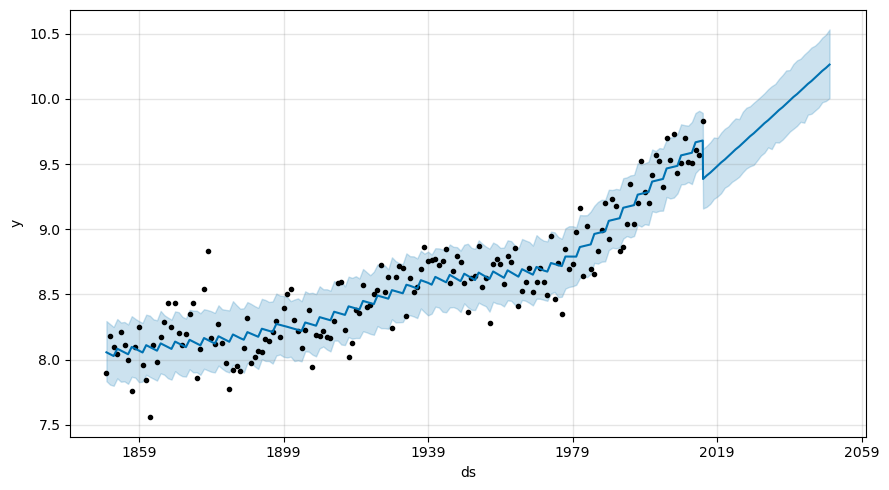

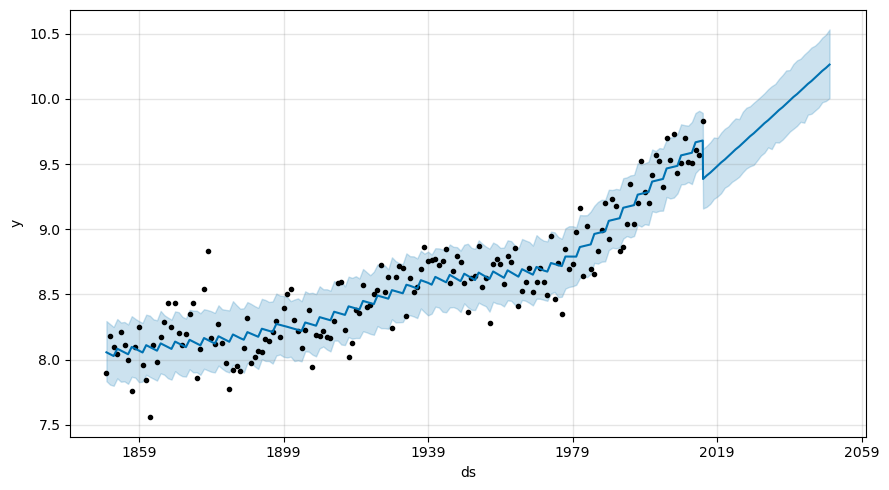

In [65]:
m1.plot(forecast1,figsize=(9,5))

> For the first prophet model attempt no parameters have been set. Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. Here the model disabled daily and weekly seasonality but kept the yearly seasonality. That is causing an oddity in the prediction where there first is a sharp drop in the average temperature. In the alternative below the settings are more adapted to the dataset.

##### Alternative 2: scale = 1, no seasonality

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


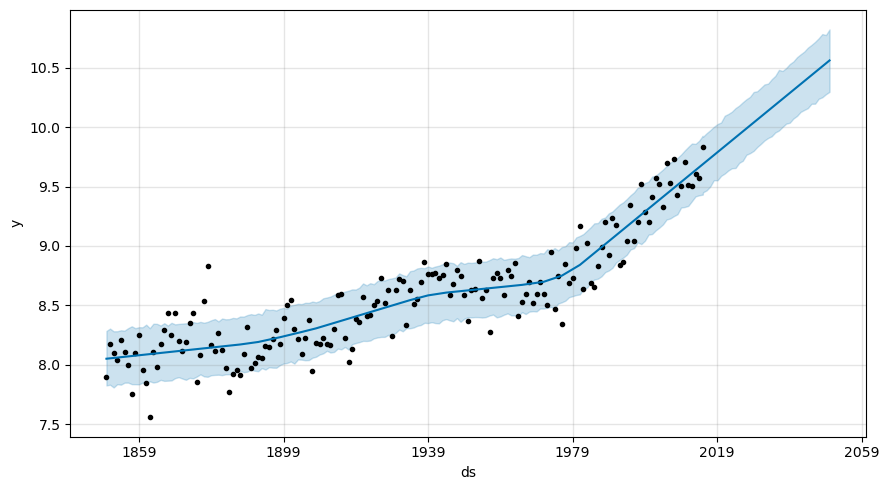

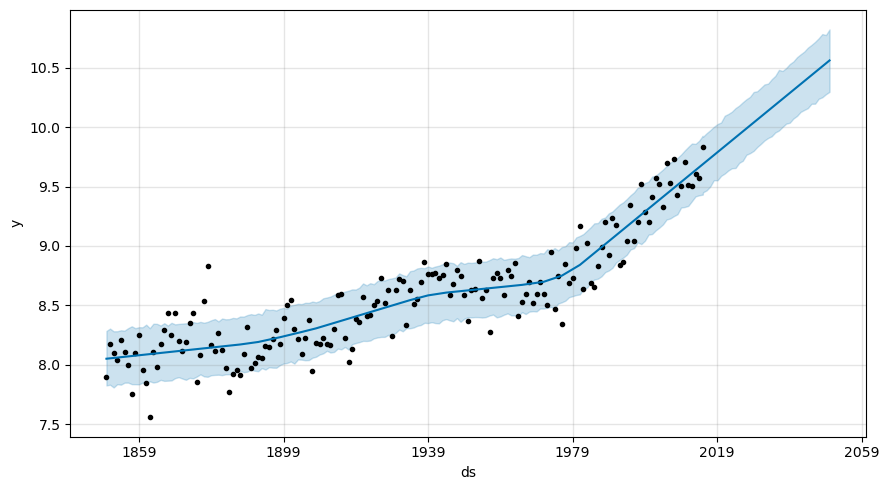

In [66]:
m2 = Prophet(growth='linear', 
             seasonality_prior_scale=1, 
             yearly_seasonality=False, 
             weekly_seasonality=False)
m2.fit(df_temp_fb)
forecast2 = m2.predict(future)
m2.plot(forecast2,figsize=(9,5))

In [67]:
forecast2.tail().T

,197,198,199,200,201
ds,2046-01-31 00:00:00,2047-01-31 00:00:00,2048-01-31 00:00:00,2049-01-31 00:00:00,2050-01-31 00:00:00
trend,10.461331,10.486215,10.511099,10.53605,10.560934
yhat_lower,10.196939,10.238253,10.25111,10.27673,10.296571
yhat_upper,10.717108,10.747195,10.782849,10.774652,10.822145
trend_lower,10.372999,10.394401,10.41379,10.433873,10.455032
trend_upper,10.549739,10.578791,10.608799,10.637306,10.6682
additive_terms,0.0,0.0,0.0,0.0,0.0
additive_terms_lower,0.0,0.0,0.0,0.0,0.0
additive_terms_upper,0.0,0.0,0.0,0.0,0.0
multiplicative_terms,0.0,0.0,0.0,0.0,0.0


> The sudden drop has disapeared and the predicions look more realistic. At 2050 the yearly average temperature will have risen up unto more than 10.5 degrees, which does not look good.

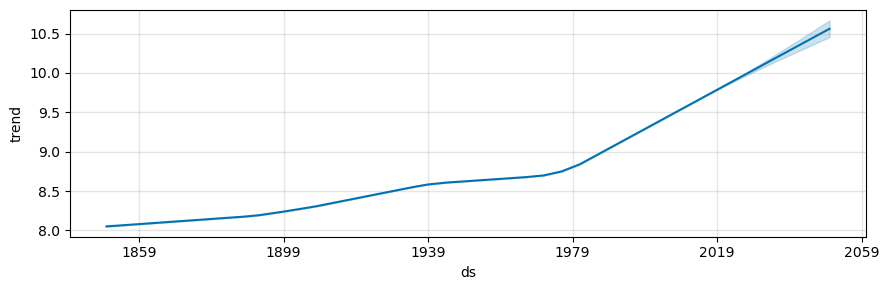

In [68]:
# Plotting the forecast components
m2.plot_components(forecast2);

> In the trend plot we can clearly see an upward trend. From about 1979 the rise in the average temperature is visibly increasing on a faster pace.

##### Prediction of a certain year with confidence interval

In [69]:
#print(yearly.iloc[-1]['LandAverageTemperature'])

yr = '2050-01-31'
print('Predictions for',yr)
print('Lower view:', forecast2[forecast2.ds == yr].iloc[0]['yhat_lower'])
print('View: ', forecast2[forecast2.ds == yr].iloc[0]['yhat'])
print('Upper view:', forecast2[forecast2.ds == yr].iloc[0]['yhat_upper'])

Predictions for 2050-01-31
Lower view: 10.296570726771646
View:  10.560934232906224
Upper view: 10.822144702000536


> Just as the ARIMA model, the Prophet model predicts that the yearly average temperature will be above 10 degrees at the year 2050. The big difference here is that the confidence interval is way smaller than the one of the ARIMA model. If we look at the lower view of the prediction, which is the optimistic view, we would still be above 10 degrees Celsius.